In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
import numpy as np
from scipy.stats import linregress

realtor_data = "Resources/RealtorData.csv"
realtor_file_df = pd.read_csv(realtor_data, encoding="ISO-8859-1")
realtor_file_df


,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0
...,...,...,...,...,...,...,...,...,...,...
1048570,for_sale,5.0,4.0,0.14,Hollis,New York,11423.0,2574.0,11/8/2004,1175000.0
1048571,for_sale,7.0,4.0,0.09,Hollis,New York,11423.0,NaN,12/15/2021,1349000.0
1048572,for_sale,5.0,3.0,0.09,Hollis,New York,11423.0,NaN,7/18/2018,925000.0
1048573,for_sale,4.0,3.0,0.13,Hollis,New York,11423.0,NaN,3/12/2003,1350000.0


In [100]:
realtor_file_df['prev_sold_encoded'] = realtor_file_df['prev_sold_date'].map(lambda x: 'Yes' if pd.notna(x) else 'No')
realtor_file_df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0,No
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0,No
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0,No
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0,No
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0,No
...,...,...,...,...,...,...,...,...,...,...,...
1048570,for_sale,5.0,4.0,0.14,Hollis,New York,11423.0,2574.0,11/8/2004,1175000.0,Yes
1048571,for_sale,7.0,4.0,0.09,Hollis,New York,11423.0,NaN,12/15/2021,1349000.0,Yes
1048572,for_sale,5.0,3.0,0.09,Hollis,New York,11423.0,NaN,7/18/2018,925000.0,Yes
1048573,for_sale,4.0,3.0,0.13,Hollis,New York,11423.0,NaN,3/12/2003,1350000.0,Yes


In [101]:
realtor_file_df.duplicated().sum()

926465

In [102]:
realtor_file_df.drop_duplicates()

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded
0,for_sale,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0,NaN,105000.0,No
1,for_sale,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0,NaN,80000.0,No
2,for_sale,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0,NaN,67000.0,No
3,for_sale,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0,NaN,145000.0,No
4,for_sale,6.0,2.0,0.05,Mayaguez,Puerto Rico,680.0,NaN,NaN,65000.0,No
...,...,...,...,...,...,...,...,...,...,...,...
1048521,for_sale,4.0,3.0,0.09,Rosedale,New York,11422.0,NaN,3/18/2002,849990.0,Yes
1048539,for_sale,6.0,5.0,0.09,Rosedale,New York,11422.0,2315.0,4/9/2021,1279000.0,Yes
1048543,for_sale,1.0,1.0,NaN,Hollis,New York,11423.0,NaN,2/11/2021,190000.0,Yes
1048558,for_sale,1.0,1.0,NaN,Hollis,New York,11423.0,NaN,NaN,179000.0,No


In [103]:
realtor_file_df.fillna(0,inplace=True)


In [104]:
new_york_df = realtor_file_df[realtor_file_df['city'] == 'New York']
new_york_df

,status,bed,bath,acre_lot,city,state,zip_code,house_size,prev_sold_date,price,prev_sold_encoded
465089,for_sale,2.0,2.0,0.0,New York,New York,10021.0,0.0,0,1185000.0,No
465111,for_sale,12.0,14.0,0.0,New York,New York,10014.0,8528.0,0,29995000.0,No
465513,for_sale,2.0,2.0,0.0,New York,New York,10022.0,1425.0,0,895000.0,No
465515,for_sale,1.0,2.0,0.0,New York,New York,10005.0,1166.0,1/10/2014,985000.0,Yes
465516,for_sale,1.0,1.0,0.0,New York,New York,10065.0,761.0,8/18/2020,810000.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...
1047710,for_sale,1.0,1.0,0.0,New York,New York,10010.0,750.0,6/2/2016,1300000.0,Yes
1047729,for_sale,1.0,1.0,0.0,New York,New York,10025.0,0.0,10/31/2014,625000.0,Yes
1047753,for_sale,3.0,4.0,0.0,New York,New York,10016.0,2880.0,5/19/2017,5750000.0,Yes
1047842,for_sale,2.0,1.0,0.0,New York,New York,11368.0,0.0,1/10/2018,182000.0,Yes


In [105]:
[col for col in new_york_df.columns if pd.api.types.is_numeric_dtype(new_york_df[col])]

['bed', 'bath', 'acre_lot', 'zip_code', 'house_size', 'price']

In [106]:
clean_df=new_york_df[[col for col in new_york_df.columns if pd.api.types.is_numeric_dtype(new_york_df[col])]]
clean_df.head()

,bed,bath,acre_lot,zip_code,house_size,price
465089,2.0,2.0,0.0,10021.0,0.0,1185000.0
465111,12.0,14.0,0.0,10014.0,8528.0,29995000.0
465513,2.0,2.0,0.0,10022.0,1425.0,895000.0
465515,1.0,2.0,0.0,10005.0,1166.0,985000.0
465516,1.0,1.0,0.0,10065.0,761.0,810000.0


## How are housing price and house size attribute correlated?

In [107]:
clean_df.corr()

,bed,bath,acre_lot,zip_code,house_size,price
bed,1.000000,0.846606,0.062408,0.113043,0.409288,0.526205
bath,0.846606,1.000000,0.035603,0.005997,0.488392,0.654655
acre_lot,0.062408,0.035603,1.000000,0.022447,0.289963,-0.003267
zip_code,0.113043,0.005997,0.022447,1.000000,-0.005397,-0.066877
house_size,0.409288,0.488392,0.289963,-0.005397,1.000000,0.493799
price,0.526205,0.654655,-0.003267,-0.066877,0.493799,1.000000


<Axes: >

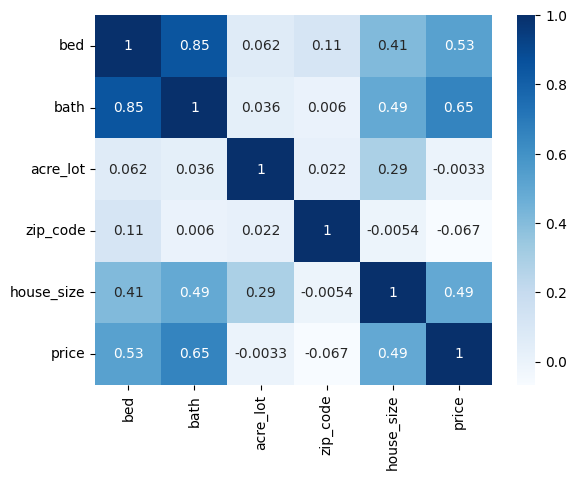

In [108]:
sns.heatmap(clean_df.corr(), annot=True, cmap="Blues")

## 
- In the context of a housing market, various attributes can be analyzed to understand their relationships and how they influence each other. Therefore, I created a heatmap as a visual representation of correlation coefficients between different variables. 

- Correlation coefficients range from -1 to 1: It measures the strength and direction of the linear relationship between two variables (-1 indicates a perfect negative correlation; 0 indicates no correlation; +1 indicates a perfect positive correlation)

- The intensity of the color represents the strength of the correlation.

- I chose the most relevant attribute other than bed/bath, that are likely to impact the housing market, which will be the house sizes in this case as it displays a 0.49 correlation of coefficients. 


In [109]:
x_axis=['house_size']
quartiles = clean_df["house_size"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of house size is: {lowerq}")
print(f"The upper quartile of house size is: {upperq}")
print(f"The interquartile range of house size is: {iqr}")
print(f"The the median of house size is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of house size is: 0.0
The upper quartile of house size is: 1318.0
The interquartile range of house size is: 1318.0
The the median of house size is: 638.0 
Values below -1977.0 could be outliers.
Values above 3295.0 could be outliers.


In [110]:
house_df = clean_df[~((clean_df[x_axis] < (lowerq - 1.5 * iqr)) | (clean_df[x_axis] > (upperq + 1.5 * iqr))).any(axis=1)]

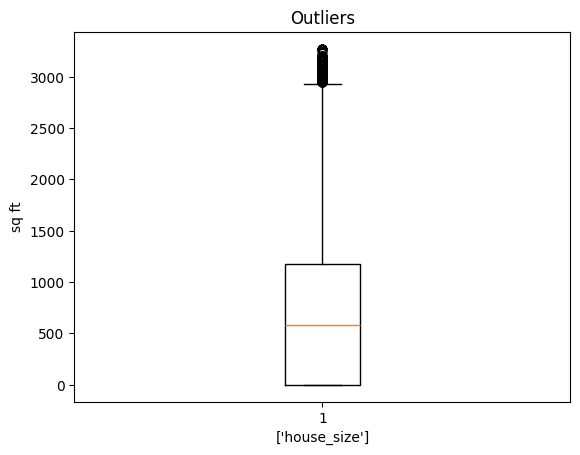

In [111]:
x_axis=['house_size']


plt.boxplot(house_df[x_axis])
plt.xlabel(x_axis)
plt.ylabel("sq ft")
plt.title('Outliers')
plt.show()

The r-value is 0.4937988878887104


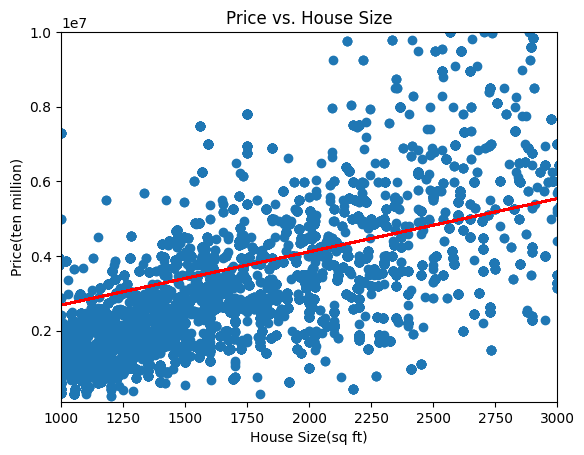

In [112]:
# Define a function to create Linear Regression plots
x_values = new_york_df['house_size']
y_values = new_york_df['price']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
# Linear regression on House Size vs. Price
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "-r")
plt.xlabel('House Size(sq ft)')
plt.ylabel('Price(ten million)')
plt.title('Price vs. House Size')
plt.xlim(1000,3000)
plt.ylim(100000,10000000)
plt.annotate(line_eq,(3000,0.2),fontsize=15,color="red")
print(f'The r-value is {rvalue}')
plt.show()


- There is a moderate positive relationship between house sizes and the prices in New York City.

# Analysis of House Size vs. Price
Looking to find the correlation between house size and house pirces, I utilized a box plot to display the distribution of data points. Found the quartiles and interquartile and plotted the box plot. From there, I see that house size data points beyond 3295 sq ft are outliers. Then I created a scatter plot and set the x limit which is the house size to 3000 sq ft so the plot are not concentrated on the outliers. As we can see, the scatter plot denotes that there is a moderate positive relationship between house sizes and the prices in New York City with a r-value of 0.49 which is the measure of linear trend between the two variables. Price and house size tends to show a stronger relationship when the house size is smaller (<2000 sq ft). As house size grows the relationship becomes weaker. When the house size reaches above 2500 sq ft, house size along becomes a weaker indicator of price.

